# IIA project GG3: Neural Data Analysis

Easter 2023<br>
Project Leader: Yashar Ahmadian (ya311)<br>
Group members: Arihant Pandey (ap2207), Junhyuck Kim (jk808), Derek Jinyu Dong (jd976)




## Important dates

Project start: __Thursday May 11 2023 9:30am GMT+1 (UK summer time)__ 

Interim report deadline: 🔥__Friday 19 May 2023, 4pm__🔥 (electronic submission via Moodle)
<br>
(Interim report should contain report on tasks under the header "**Week 1**".

Presentations: __Monday 5 June 2023, 11am-12:30pm in LT6__

Final project report deadline: __Friday 9 June 2023,  4pm__ (electronic submission via Moodle)


## Project notes

- You should spend about 20 hours a week on the project, basically half of your time.
- Project is to be carried out in **Google Colab** or on your own computer. You can download this notebook and use it with a normal Jupyter server, or duplicate it here in your **Colab** account. If you do the latter, you can share and show your work easily. The computational resources on **Colab** are limited, so you may find it more convenient to run the programs on your own computer, especially in the later parts of the project when computations will be heavier. When you need to ask a question about a specific piece of code, you can still use the **Colab** to share a notebook. 
- Weekly sessions will be held on Mondays 11:00-13:00, and Thursdays 9:00-11:00 and 14:00-16:00 all in **LR11** (EXCEPT for Monday 5th June which will be in LT6). 
- Attendance is compulsory for the first/introductory session and all Monday sessions. Thursday sessions will be optional (although this is still subject to change), but attending them is a good way to get answers to questions, some help with coding. It also provides space for teamwork with your teammates. 
- You are strongly encouraged to seek verbal feedback after your interim report - there will be a special session for this on Monday May 22 and Thursday May 25. 
- Project carries 80 marks overall:
  - 20 marks for interim report (individual)
  - 20 marks for presentation (group based)
  - 40 marks for final report (individual)<br>
  
  
### Project reports
  - Should be clearly broken down by _Tasks_ (see below), any notes you wish to make in how you or your group structured and carried out the tasks, and most importantly your __results__ in the form of completely labelled graphs, and __accompanying conclusions__ you draw from your results. 
  - Interim report about 4-6 pages, and final report about 14-18 pages, when converted to a PDF (excluding appendices such as attached code, but _including_ figures). The final report can be an extension of the interim report, but make sure you take into account the feedback you receive for your interim report.  
  - When deciding what to include in your report, how to organise it and what to emphasize, please prioritise communicating understanding over formalities - I would like give you marks for doing the right thing and showing that you did it and understand it. If I have to wade through pages of undigested data and graphs shown just because it was there, I will feel less generous. The length requirements are only guidelines. 
  - Take a look at [this page](http://teaching.eng.cam.ac.uk/node/444/#hdr-9) and [this](http://teaching.eng.cam.ac.uk/node/340) for further guidance and recommendations for writing reports.
  - __All code__ that you used during to project must be attached as an appendix to your reports. If you modified one of the provided `.py` file (and you used that modified version for that report), include it. 
  - A jupyter or **Colab** notebook are acceptable as a report, as long as it is "clean" (its main section includes text and figures) and reads like a report, and (importantly) can be converted to a PDF, so you can upload it to the Moodle submission protal. 
  - Incude [cover sheets](http://teaching.eng.cam.ac.uk/node/4171) provided by the Teaching Office
  
### Presentations:
- Each group will jointly prepare and present a 12 minute (strict!) presentation, broken up into three **4-minute parts** each delivered by one of the team members. There will be 3 minutes of question time after each talk, and so overall the session should take about an hour and a half. 

- Since most tasks are not really divided, the part presented by a student need not be something they solely contributed to. 
- The presentations will be held at the end of Week 3 or beginning of Week 4.
- I will give guidelines and recommendations for making good presentations in due course. 

## Timeline

See the Approximate Timeline section below.

## Survey

The **online survey** should be completed at the end of the project period. 

# Neuroscience Background

The background is also provided as a Jupyter notebook [accessible here](https://github.com/ahmadianlab/gg3_nda/blob/main/Background.ipynb). 

**Note:** The main point of the Background handout is to introduce some terminology (which appear all in boldface),<br>
and mathematical notation that will be used in the next section, "What is the right model of LIP?"<br> 
Deep understanding of this Background  section is not required for carrying out the project. But, apart from the<br>
above reason, you are encourged to read it to understand the scientific motivations and significance of this problem.

# What is the right model of LIP?

### Alternative hypothesis: stepping model

As we saw in the Background section, classic studies suggested that LIP neurons which exhibit ramping activity in<br>
their trial-averaged PSTH's are involved in evidence accumulation. However, the story became more complicated,<br>
when in 2015, [Latimer et al.](https://www.science.org/doi/10.1126/science.aaa4056) provided evidence that most LIP neurons are better modelled<br>
 as neurons with a "stepping firing rate". In this alternative model
 the rate does not continuously ramp up or down<br>  (albeit via a random walk) as in a drif-diffusion model.
Rather, the rate is piece-wise constant:<br> it starts relatively low, but at some time point it jumps ("steps") up discontinuously to <br>
a higher firing rate level. The jump point is random and varies from trial to trial, according to some distribution. <br>

#### -------------------------------   Figure 5   -------------------------------
<img src="figs/latimer-step-ramp.png" width=600 height=600 />

We will refer to these two competing hypotheses or models as the **ramping** and **stepping models**, respectively<br>
(other common synonyms for the ramping model are "the drif-diffusion model", mentioned above, and "the diffusion-to-bound model";<br>
we will also use **jump model** as synonymous with the stepping model.) 

In this project we aim to develop tools that allow us to reject or accept one of these hypotheses<br>
based on observed spike trains. Understanding which of the two is a more accurate description of LIP activity <br>
is scientifically significant. The ramping hypothesis suggests that LIP cortex is responsible<br>
for accumulating evidence to inform and make decisions. On the other hand, the binary nature of the stepping model<br>
suggests that LIP is downstream of the evidence accumulating area, and may simply reflect, in its activity, the decision already made<br>
in an upstream area.

# Two generative models


So far, our two "models" have mostly remained conceptual and qualitative. At this high, conceptual level <br>
I will therefore refer to them as hypotheses instead: the ramping hypothesis vs. stepping hypothesis. <br>
However, in order to use the powerful tools of probability theory and machine learning, we need to <br>
turn these conceptual hypotheses into well-defined mathematical models.

### The common, abstract model structure
The ramping and stepping models to be described here and simulated in the project,  are examples of<br>
**probabilistic generative models**. Each model has a set of **parameters** (such as the drift rate of the ramping model),<br>
and it stochastically generates data, in our case spike trains. The systematic behaviour of these spike trains depends<br>
 on the various model parameters. Mathematically, this stochastic relationship between the parameters and data<br>
 is given by a conditional probability distribution

$P(\mathrm{data}| \Theta, M)$

where $\Theta$ denotes the set of parameters and $M$ denotes the model (in our case $M$ = ramping, or $M =$ stepping).<br>
This conditional probability, when viewed as a function of $\Theta$, is called the model's **likelihood function**.<br>
By (observed) "data" we mean a set of spike-trains recorded (in our case simulated) over many trials:

$
\text{data} \equiv \{(n_t)_{t=1}^T\}.
$

$n_t$ will sometimes be referred to as **observed variables**.

**Latent variables:** As generative models, the two models can also be simulated to generate spike trains. In order to do this, <br>
the two models first generate a firing rate function or time-series, $r_t$. The spike count, $n_t$, in a given<br>
time bin is then stochstically generated based solely on $r_t$. The rate sequence $r_t$ is itself a stochastic<br>
process, and depends on a set of *latent variables*. Latent variables are random variables that are so called<br>
because they are not directly observed by us (data-)scientists and engineers, but need to be inferred from observed<br>
data (the spike trains). In the simple version of the stepping model, with which we will start, there is only <br>
a single latent variable: the stepping time. The ramping model, on the other hand, generates a whole sequence of <br>
latent variables in each trial: these are the values of the ramping stochastic process, which is closely tied to the<br>
firing rate.

Since the latent variables (unlike the model parameters) vary from trial to trial, in each trial they need to be<br>
inferred from a single spike-train. By contrast, parameters which control the systematic behaviour of the model will<br>
be inferred from the entire dataset, i.e. the collection of spike trains in all trials.

**Discrete vs continuous time:** Both models are implemented in discrete time. Thus the varible $t$ above is an integer<br>
(index for the) time-step. We will denote the (fixed) total number of time steps in a trial by $T$. Real trials<br>
last on the order of 1 second, and we would want our time steps or time bins to be around 1 to 10 milliseconds. <br>
So, correspondingly, $T$ will be rather large, we will experiment with $T=$ 100 to 1000. For various purposes, <br>
we will need to convert from discrete to continuous time in seconds. For that purpose we will fix the trial duration at<br>
1 second and thus interpret each time-step to have duration $1/T$ seconds; we will denote this by $dt$ here and in the code<br>
(thus $dt = 1/T$ seconds).

We will now describe the probabilistic structure of the two models in some detail.

### Stepping model

**Latent variables:** This is the simpler one of the two. The only latent variable of this model is the step time or **jump time**. <br> 
I will denote the step time in trial $j$ by $\tau_j$. Since we work in discrete time, $\tau_j$ is a (non-negative) integer.<br>
In `models.py` the corresponding variable is called `jump` or (when containing the value of multiple trials) `jumps`.<br>
In each trial, the step time is sampled from some probability distribtion:

$\tau \sim P(\tau)$

In the provided code this distribution is a so-called **negative binomial distribution** (see [this](https://en.wikipedia.org/wiki/Negative_binomial_distribution)) with two parameters: $m$ and $r$.<br>
$m$ sets the average step time, and $r$ ... that's left for you to figure out.<br>

<br>$\quad$ **negative binomial distribution:**<br>
$\quad$ In each trial the probability of success is p and of failure is 1-p. We observe this sequence until a predefined number r of successes occurs.
$ \qquad \tau \sim NB(r,p)$<br>
$ \qquad E[\tau] = m = r(1-p)/p$<br>

As we said above, in each trial, the firing rate sequence of this model is piece-wise constant. If we denote the jump time of trial<br>
$j$ by $\tau_j$, then for $t < \tau_j$, $r_t = R_0$ and for $t \geq \tau_j$, $r_t = R_h > R_0$, where the two constants $R_0$ and $R_h$ are <br>
part of the model parameters. We will refer to them as pre- and post-step firing rates. 

Finally, given the rate sequence, $r_t$, the spike counts in different timesteps are generated indpendently from a [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution):

$n_t \sim \mathrm{Poiss}(r_t dt)$

Note  that since we measure rates in Hz, $dt$ has to be in seconds, in order to get the right dimensionless parameter (mean spike count) of <br>
of the Poisson distribution. 

**Fit parameters:** $m, r, \text{ and } x_0$.

These are the parameters which you aim to infer from spike train datasets.<br>
$x_0$ is equivalent to $R_0$ and is given by $R_0/R_h$; think of it as the noramalised pre-step rate<br>
(we use $x_0$ instead of $R_0$, to match the similar parameter in the ramping model). By definition $0< x_0 < 1$.

**"Fixed" parameters:** We will take $R_h$ as known/fixed, and will not infer it from data. For many project tasks we will fix it at $R_h = 50$ Hz.<br>
Though in early tasks you will explore its effects by varying it.

### Ramping model

**Latent variables:** This model, which approxmiates the continuous time drift-diffusion model, has a whole sequence of latent variables<br>
which we will denote by $x_t$. This variable is the so-called **decision variable**. The update equations for $x_t$ are discretised versions<br>
of the equation in Figure 3:

$x_{t+1} = x_t + \beta dt + \sigma \sqrt{dt} \epsilon_t \qquad\qquad\qquad$            Eq. (1)

where 

$\epsilon_t \overset{iid}{\sim} \mathcal{N}(0,1) \qquad\qquad\qquad$            Eq. (2)

(i.e. $\epsilon_t$ is sampled independently in each time step from the standard normal distribution, $\mathcal{N}(0,1)$, in other words, it has<br>
a Gaussian distribution with mean 0 and variance 1.) The initial condition is set via

$
x_1 = x_0 + \sigma \sqrt{dt} \epsilon_0
$

where $\epsilon_0$ is again standard normal, and $x_0$ is a model parameter (and not a latent variable, <br>
as it is the same across all trials). (Note that, due to python indices starting from 0, the equation above will (implicitly)<br>
appear as `x[0] = x0 + sigma * np.random.randn()` in the code).

The firing rate in this model is a rectified and scaled version of $x_t$:

$r_t = R_h [x_t]_+ = R_h \max(0, x_t)$

It is not hard to see that the sequential variables $x_t$ form a Markov chain (this has to do with the fact that $\epsilon_t$<br> in different
trials are independent), and therefore the ramping model is an example of a **hidden Markov model (HMM)**.<br>
In fact, if you have taken 3F8, you will realise that $x_t$ is *almost* an AR(1) Gaussian Process. I said almost an AR(1) Gaussian process, because<br>

*when $x_t$ reaches 1, it will get stuck there for the rest of the trial*. (Equivalently, after this point, the firing rate, $r_t$, stays at its<br>
maximal level $R_h$.)

This reflects the interpretation of $x_t$ as a decision variable, which upon reaching a pre-set bound or threshold, triggers<br>
the decision; in our case the bound is 1. 

Similar to the stepping model, given the rate sequence, $r_t$, the spike counts in different timesteps are generated indpendently from a Poisson distribution

$n_t \sim \mathrm{Poiss}(r_t dt)$.

**Fit parameters:** $\beta, \sigma, \text{ and } x_0$.

$\beta$ and $\sigma$ control the systematic drift vs. stochasticity of the ramping variable $x_t$.<br>
Similar to the stepping model, $x_0$ sets the initial rate, $r_0$, via $r_0 = R_h x_0$. And again $0< x_0 < 1$.

**"Fixed" parameters:**  $R_h$, maximal rate, to be treated as in the stepping time.


### Ignored stimulus dependence

In the full version of the ramping model, the magnitude and sign of $\beta$ depends on the coherence and the direction of motion of the RDM stimulus<br>
in that trial. However, for simplicity, in this project we assume $\beta$ is fixed in all trials and assume it is positive.<br>

Similarly, in the full version of the stepping model, the post-jump rate can take two possible values $R_h > R_0$, as described above, <br>
or $R_l < R_0$. We can call $R_h$ and $R_l$ the up or down rates, and call their normalized values of 1 and $R_l/R_h < 1$ up and down states.<br>
The probability with with the model transition up or down after the jump time can again depend on the coherence and direction of motion of the <br>
RDM stimulus in a trial. But again, to simplify the model, we ignore this fact. In fact, for most of the project we work with a stepping model<br>
without a down state. 



# Approximate timeline


Our task in this project is to slowly build up techniques to ultimately reject or accept one or the other hypothesis based on 
recorded (or, in our case, simulated) spike trains. We will do this by progressively moving from lower to higher levels of 
probabilistic inference. 


- (week 1) explore the behaviour of the two models based on simulator code provided to you in `models.py`.<br>
And take preliminary steps towards developing a discrete-state HMM approximation to them, which allows us to apply  powerful inference tools. 

- (week 2) develop tools to carry out **single-trial inference**  of the models' latent variables from observed  
on single spike trains, taking advantage of their HMM formulation.

- (weeks 2-3) Assuming model $M$ is the true model underlying data, use Bayesian or maximum-likelihood inference to infer or estimate<br>
model parameters, $\Theta$, based on observed data, that is, many trials of simulated spike trains. 

- (weeks 3-4) Use Bayesian inference to select/reject one or the other hypothesis/model, given a dataset of spike trains.<br> 

Depending on feedback and pace of progress, in week 4 we will also investigate the consequences of model mismatch. Since "all models are wrong (but some are useful)",<br> 
what can we say about the possibility of reaching wrong conclusions regarding our alternative conceptual hypotheses, due to <br>
some arbitrary choices we had to make in translating those conceptual models to concrete mathematical models?


# Running on Colab vs Deepnote
As I said in the Intro lecture, the project Jupyter notebook is accessible, via these links, on both [Deepnote] and 
on [Google Colab]. You can choose to run your notebook on either of those (for Deepnote you will need to sign up
and create an account with them), or you can download it and run things on your own machine, which may be faster. 

If you choose to work on Deepnote you will need to "Duplicate" the notebook (using the blue
button on the top right) so that you can make and save your changes. Similarly, if you use Colab, you will have to
"Save a copy in Drive" in order to be able to save your changes (if you don't have Google Drive, then either sign up, or download and
work on your laptop, or use Deepnote).

Finally, the `.py` modules (including Week 1's `models.py`) are accessible and can be download from the Deepnote. 
On Colab, you will have to run the following cell to import them. 

In [19]:
mode = "local" # change this to "local" if you are on Deepnote or your own computer

if mode == "local":
     from models import *
     from models2 import *

elif mode == "colab":
    import requests
    url = 'https://github.com/ahmadianlab/gg3_nda/blob/main/models.py?raw=true'
    r = requests.get(url)
    with open('models.py', 'w') as f:
        f.write(r.text)
    import models
else:
    raise Exception("mode must be either local or colab")

# Week 1



### Task 1.1

Study the code in `models.py`, specifically the implementations of the two models in the `StepModel` and `RampModel` classes. <br>
The main part to study (and relate to the mathematical discussion above) is their `simulate` method/function. You create <br>
an object instance of each model by providing the model parameters (both "fit" and "fixed" parameters, as named above)<br>
to the class constructors: e.g. `ramp = RampModel(beta=...)`. <br>
(Ignore the other input arguments in the class constructor `__init__` for now, and leave them at their default values.)<br>
Once a model object is created you can use its `simulate` method to get an array of spike trains over multiple trials. <br>
(For usage see the docstring (or run help via `ramp.simulate?`.) `simulate` will also return the generated latent variables, <br>
and, optionally, the firing rates in different trials. 

**Visualise the simulated spike trains by writing code to make so-called "spike raster" plots.** See the bottom row of Figure 5<br>
above for example spike raster: different rows represent the spike trains in different trials, and spikes are shown by dots. <br>
(you can put a dot for every nonzero $n_t$, even if the nonzero value is more than 1; this is unlikely if you keep `Rh` below<br>
50 Hz and use a `T` of at least 100 (recommended). At this stage it should not be time-consuming to use higher `T`'s as well,<br>
e.g. `T = 1000` (corresponding to 1 millisecond time-steps). If you are simulating hundreds of trials, you don't want to include<br>
all of them in the raster. Use your common sense to decide how many trials to include in the raster; this a visualisation tool used to get<br>
an idea of how spike trains behave qualitatively by seeing a good number of example. 

**Vary the parameters of each model and generate spike rasters in different regions of the parameter space, trying to find<br>
qualitatively different behavior.** The default values of the parameters give you a first guess or the right order of magnitude for the <br>
different parameters. (For `m` and `r` of the step model, note that they should scale with the `T` you will be using for the simulation;<br>
in particular, for more interesting/relevant results, you would want to set `m` at or near `T / 2` so that the steps happen on average in the middle of the trial.)

**What systematic patterns can you detect?**

**Write code to also mark the jump times in different trials over the spike trains in the raster. <br>
Also make histograms of jump times. What is the effect of the `r` parameter on the behaiour of the stepping model?**<br>

Similarly make plots of the trajectories of $x_t$ or $r_t$ (of the ramp model) in several trials, in a single plot.<br>
You can extract the time when $x_t$ of the ramping model hits its upper bound of 1 (equivalently $r_t$ reaches $R_h$), and histogram that as well.<br> 
**How do `beta` and `sigma` affect this histogram or the behaviour of the $x_t$ trajectories?**



In [2]:
import numpy as np
import matplotlib.pyplot as plt
N = 6000
T = 100
times_ms = np.linspace(1e3/T,1e3,T)

/var/folders/tr/k4p6cxld3ql638sby8p0sr500000gn/T/ipykernel_22105/2082117770.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


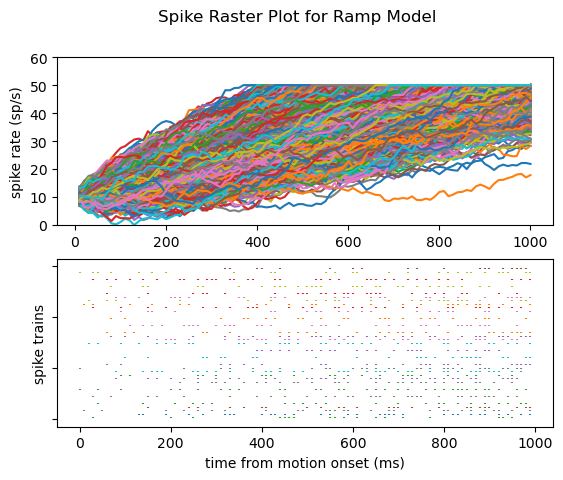

In [3]:
ramp = RampModel(beta=1, sigma=0.2, x0=.2, Rh=50)
ramp_arr = ramp.simulate(Ntrials=N, get_rate=True, T = T)

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle("Spike Raster Plot for Ramp Model")

for i in range(len(ramp_arr[2])):
    ax1.plot(times_ms, ramp_arr[2][i])
ax1.set_ylabel("spike rate (sp/s)")
ax1.set_ylim(0, 60)

# record time of spikes in milliseconds
spike_trains_timestamp = []
for spike_train in ramp_arr[0]: # for each trail
    timestamp = []
    for i in range(len(spike_train)): # for each time point
        #if spike_train[i]!=0:          # if an spike event occurs at this time stamp
        for j in range(spike_train[i]): # This change is to handle the case where there are multiple spikes in a time stamp
            timestamp.append(i*1e3/T)
    spike_trains_timestamp.append(timestamp)
    
colors1 = ['C{}'.format(i) for i in range(len(ramp_arr[0]))] #set different color for each set of neural data
ax2.eventplot(spike_trains_timestamp, colors=colors1, linelengths=0.2)
ax2.yaxis.set_tick_params(labelleft=False)
ax2.set_xlabel("time from motion onset (ms)")
ax2.set_ylabel("spike trains")

fig.show()

/var/folders/tr/k4p6cxld3ql638sby8p0sr500000gn/T/ipykernel_22105/4259764998.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


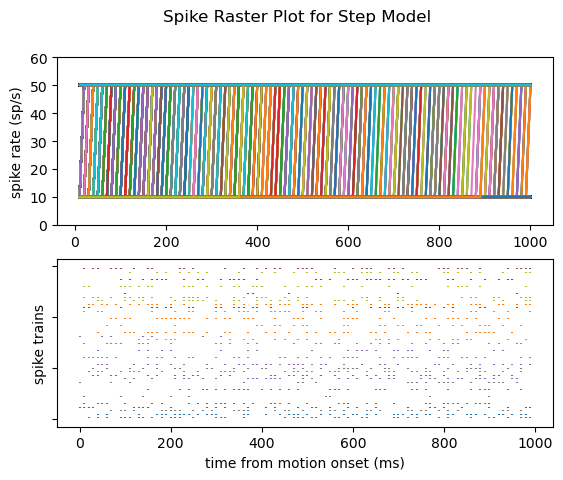

In [4]:
step = StepModel(m=50, r=0.1, x0=0.2, Rh=50)
step_arr = step.simulate(Ntrials=N, get_rate=True, T = T)

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle("Spike Raster Plot for Step Model")

for i in range(len(step_arr[2])):
    ax1.plot(times_ms, step_arr[2][i])
ax1.set_ylabel("spike rate (sp/s)")
ax1.set_ylim(0, 60)

# record time of spikes in milliseconds
spike_trains_timestamp = []
for spike_train in step_arr[0]: # for each trail
    timestamp = []
    for i in range(len(spike_train)):   # for each time point
        #if spike_train[i]!=0:          # if an spike event occurs at this time stamp
        for j in range(spike_train[i]): # This change is to handle the case where there are multiple spikes in a time stamp
            timestamp.append(i*1e3/T)
        
    spike_trains_timestamp.append(timestamp)
colors1 = ['C{}'.format(i) for i in range(len(step_arr[0]))] #set different color for each set of neural data
ax2.eventplot(spike_trains_timestamp, colors=colors1, linelengths=0.2)
ax2.yaxis.set_tick_params(labelleft=False)
ax2.set_xlabel("time from motion onset (ms)")
ax2.set_ylabel("spike trains")

fig.show()

### Task 1.2

PSTH is an important data analysis tool used in neuroscience.<br> 
This  is a statistical estimate of the trial-averaged firing rate as a function of time, based on recordings of spike trains in<br>
multiple experimental trials. It is obtained by binning/histogramming spikes (e.g. using `np.histogram`) in different time bins<br>
and averaging the resulting spike counts over many trials (you can also divide by `dt` to turn into rate in units of Hz).<br>

**Write code to construct and plot PSTH's in different regions of each model's parameter space.** Note how the PSTH <br>
fluctuates randomly from dataset to dataset. **It is better to do some sort of (temporal) smoothing in order to reduce these<br>**
fluctuations and the jaggedness of the PSTH. You can use either a sliding window (e.g. a boxcar window/functin) averaging, or simply <br>
use time bins that are larger than the oridinal time steps (e.g. 50 milliseconds -- or 5 timesteps if you are using a `dt` of 10 ms,<br> 
corresponding to `T = 100`). The smooth ramping firing rate curves in Figure 4 of the [Background](https://github.com/ahmadianlab/gg3_nda/blob/main/Background.ipynb)
are examples of smoothed PSTH's.

Even with the smoothing there will be fluctuations in the PSTH from dataset to dataset. **How does the strength of these fluctuations <br>depend on (or scale with) the number of trials (in each dataset)? Try to be quantitative about this, e.g. by using informed plots. <br>**
For the rest of this task use a high number of trials (e.g. 5000) to minimise these fluctuations. (But note <br>
that in real experiments the number of trials rarely exceeds a few hundred -- for for later tasks we will bring the number down.)


Finally, **try to find parameter regimes that make the PSTH of the stepping model very close to that of the ramp model. (First make sure<br>
the ramp model's PSTH look qualitatively like the classic ramping PSTH's in LIP experiments.) In which parameter regions<br>
does this fail drastically, and in which regimes are the two PSTH's nearly indistinguishable?**

In [5]:
from scipy.ndimage import gaussian_filter
sigma = 1.5 # Standard deviation of the Gaussian filter

In [1]:
# ## Find PSTH given spike_trains_timestamp ##

# #### Important ####
# #### Missing: plot PSTH's in different regions of each model's parameter space ####

# fig, (ax1, ax2, ax3) = plt.subplots(3)
# fig.suptitle("PSTH Diagram")

# # Calculate the PSTH
# bin_size = 20  # Choose an appropriate bin size for the PSTH (in milliseconds)
# bin_edges = np.arange(0, 1e3+bin_size, bin_size)
# psth, _ = np.histogram(np.concatenate(spike_trains_timestamp), bins=bin_edges)

# averaged_psth = (psth / bin_size * 1e3) / N # spikes per sec per trail

# # Apply Gaussian smoothing
# gaussian_smoothed_psth = gaussian_filter(averaged_psth, sigma)



# ## Find Variance given spike_trains_timestamp ##

# # Calculate the PSTH for larger bins
# bin_size_2 = 50  # Choose an appropriate bin size for the PSTH (in milliseconds)
# bin_edges_2 = np.arange(0, 1e3+bin_size_2, bin_size_2)
# psth_2, _ = np.histogram(np.concatenate(spike_trains_timestamp), bins=bin_edges_2)
# averaged_psth_2 = psth_2 / N # spikes per trail

# var_s = np.zeros_like(averaged_psth_2)


# # psth_matrix is a 2D numpy array where each row is a PSTH vector
# psth_matrix = np.zeros((len(spike_trains_timestamp), len(averaged_psth_2))); # (N x T)

# # Calculate the PSTH for each trail
# for ii in range(len(spike_trains_timestamp)):
#     psth_matrix[ii], _ = lo_histogram(np.array(spike_trains_timestamp[ii]), bins=bin_edges_2)
                       
# print(psth_matrix.shape)
# # Find the variance across trials (i.e., along the rows)
# var_s = np.var(psth_matrix, axis=0);

# # var -= averaged_psth_2**2
# # std = var ** 0.5



# ## Calculate Fano Factor ##

# fano_factors = var_s / averaged_psth_2


# # Plot the PSTH
# ax1.plot(bin_edges[:-1], averaged_psth,  label='Original')
# ax1.plot(bin_edges[:-1], gaussian_smoothed_psth,  label='Smoothed')
# ax2.plot(bin_edges_2[:-1], var_s,  label='Variance')
# ax3.plot(bin_edges_2[:-1], fano_factors,  label='Fano factor')


# ax1.set_ylabel("spike rate (sp/s)")
# ax2.set_ylabel("spike rate (sp/s)")
# ax3.set_ylabel("Fano factor")
# ax3.set_xlabel("time from motion onset (ms)")
# ax1.legend()
# ax2.legend()


# plt.show()
from models import *
from models2 import *
generate_psth(step_arr[0], 10, 50, True);

NameError: name 'step_arr' is not defined

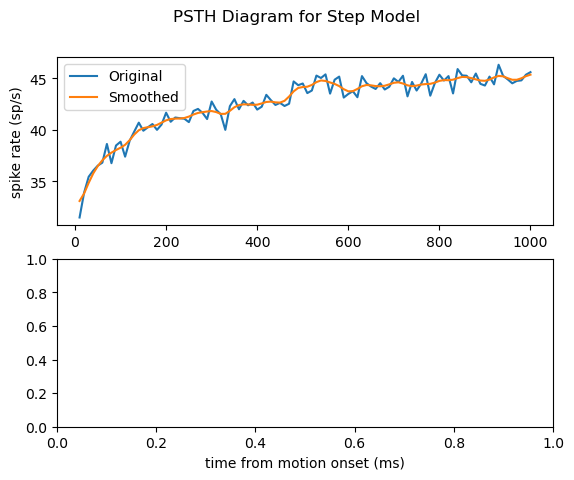

In [96]:
# Step model PSTH (calculate from spike numbers)

# This is another method to find PSTH, but I think the method in the above block should be used. (-- Derek)
#### Important ####
#### Rarely, there are two spikes in a single time stamp. Should we consider this? ####
#### Update: This issue is fixed! ####
N = 6000
T = 100
times_ms = np.linspace(1e3/T,1e3,T)
sigma = 1.5
step = StepModel(m=50, r=0.1, x0=0.2, Rh=50)
step_arr = step.simulate(Ntrials=N, get_rate=True, T = T)
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle("PSTH Diagram for Step Model")

step_arr[0] # use the simulation result from task 1.1
averaged_spike_rate = np.sum(step_arr[0], axis=0) / N * T # spikes per sec

# Apply Gaussian smoothing
gaussian_smoothed_spike_rate = gaussian_filter(averaged_spike_rate, sigma)

ax1.plot(times_ms, averaged_spike_rate, label='Original')
ax1.plot(times_ms, gaussian_smoothed_spike_rate, label='Smoothed')

# ax1.set_ylim(0, 60)
ax1.set_ylabel("spike rate (sp/s)")
ax2.set_xlabel("time from motion onset (ms)")
ax1.legend()
plt.show()


### Task 1.3

The PSTH is an example of a so-called first-order statistic, in that it is the averge of spike counts, $n_t$, which is their first moment. <br>
You can also evaluate higher order statistics, such as the variance of $n_t$ (across trials).<br>
Instead of smoothing, for evaluating the variance use larger time bins (e.g. 50 or 100 milliseconds).

**How does the variance behave as a function of time and of various parameters in each model?**

A more useful quantity is the Fano factor which is the ratio of the variance of $n_t$ to its mean (obviously both evaluated in the same time bin, in particular<br>
time bins of the same width). This quantity is 1 for the Poisson distribution (the default choice for the emission distribution of both models).<br>
**Evalute and plot the Fano Factor as a function of time, and again investigate how it changes in different parameter regimes, and importantly<br>
whether and how it behaves differently in the two models.**

In [8]:
# Required tools are in task 1.2

### Task 1.4

(This is a more open-opended and less guided task compared to the previous ones. Use brainstorming in the group and come up with creative ideas to address this, working together.)

In this task you will explore an informal or relatively ad-hoc version of what we intend to do eventually using the systematic approach of Bayesian inference. <br>
The aim is to find an intelligent but ad-hoc (in the sense that it is not Bayesian or does not rely on the models' likelihood function and only relies on 
observed statistics) way of telling the two models aparts, i.e. deciding which model generated a dataset.

Relying on 1st and 2nd order statistics you have explored, or other 2nd order statistics, and perhaps higher order statistics you can come up it,
constructing a criterion (or alternative criteria which you would compare) for deciding between the two models. To make this more challening, 
you will obviously need to put the two sets of model parameter in a regime in which they are least distinguishable from their generated spike trains. 
Use a number of trials not more than 400 for each dataset you will run your test/criterion on.

You have to test your criterion by running it on several datasets, once generated by the ramp model, and in another round, generted by the step model. 
And then quantify what percent of datasets in each case where decided/classified correctly.

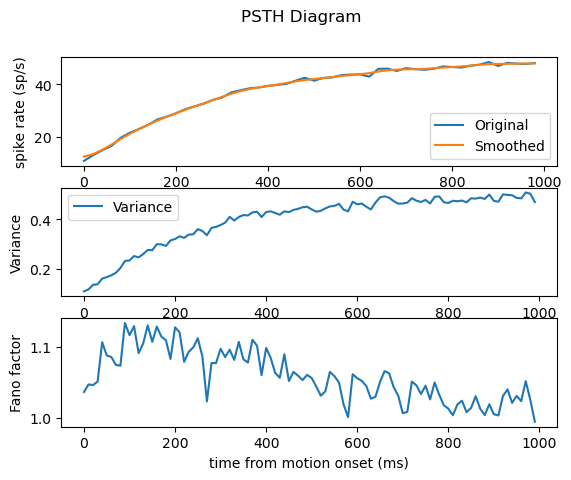

In [1]:
from models import *
from models2 import *

# step_test_dataset = generate_spike_trains(M=1, N=1000, T=100, m=50, r=1e-2, sigma=20, beta=0.5)[0]; ## dim = 2, M, N, T
# # generate_raster_and_timestamps(step_test_dataset[0]);
# generate_psth(step_test_dataset[0], 20, 50, True);

ramp_test_dataset = generate_spike_trains(M=1, N=10000, T=100, m=50, r=1e-2, sigma=1, beta=2)[1]; ## dim = 2, M, N, T
# generate_raster_and_timestamps(step_test_dataset[0]);
generate_psth(ramp_test_dataset[0], 20, 10, True);

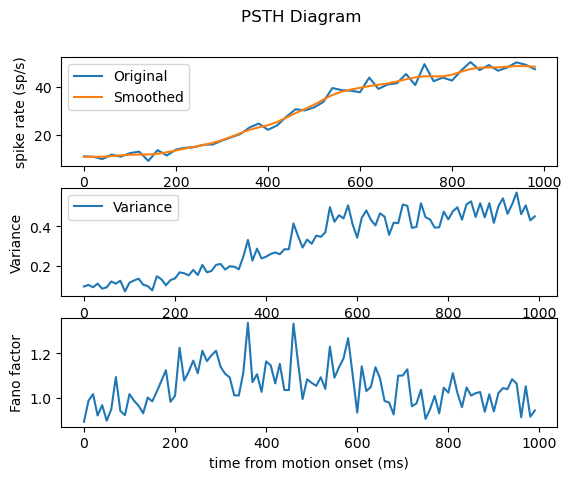

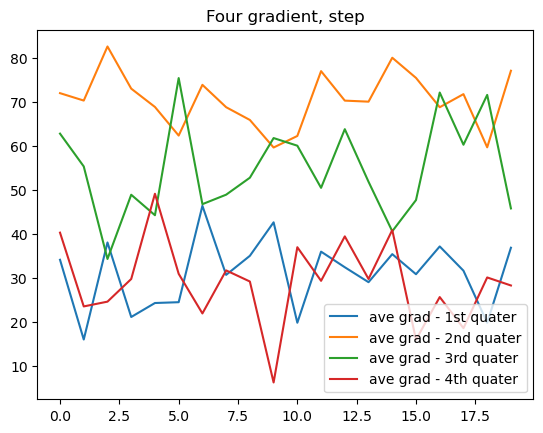

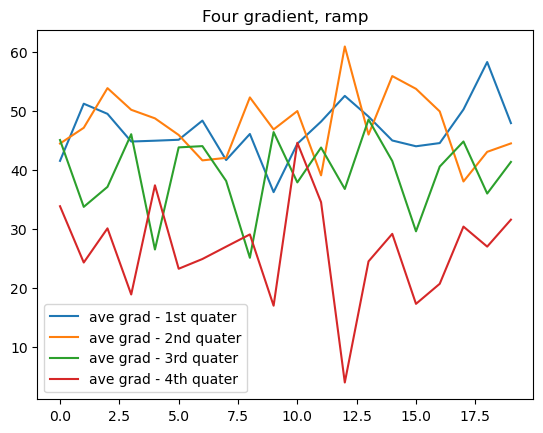

In [17]:
data_points = generate_spike_trains(M=20, N=400, T=100, m=50, r=5, sigma=0.4, beta=1)
generate_psth(data_points[0,0], 20, 10, True);

predictions = np.empty((data_points.shape[0], data_points.shape[1])) # 2 x M
var_s = np.empty((data_points.shape[0], data_points.shape[1])) # 2 x M
fano_factors = np.empty((data_points.shape[0], data_points.shape[1])) # 2 x M

N = len(data_points[0,0,:,0])
M=20
grads = np.zeros((2,M,4))

for ii in [0,1]:
    # ii = 0 -> STEP spike trains
    # ii = 1 -> RAMP spike trains
    for jj in range(data_points[ii].shape[0]): 
        spike_trains = data_points[ii, jj]; # (N by T) spike train matrix
        # Calculate the PSTH
        _,psth,_,_ = generate_psth(spike_trains, bin_size=20, bin_size_2=50)


        ### find the valid region
        derivative = np.gradient(psth, 1/50)

        # Find where the derivative is small
        small_derivative = np.abs(derivative) < 10

        # Remove these regions from the data
        filtered_psth = psth[~small_derivative]

        ### Gradient and average gradient

        # Find the gradient of the PSTH
        quat = int(len(filtered_psth)/4)
        grad_psth_1 = np.average(np.gradient(filtered_psth[0: quat], 1/50))
        grad_psth_2 = np.average(np.gradient(filtered_psth[quat:2*quat], 1/50))
        grad_psth_3 = np.average(np.gradient(filtered_psth[2*quat:3*quat], 1/50))
        grad_psth_4 = np.average(np.gradient(filtered_psth[3*quat:quat*4], 1/50))
        average_grad = (psth[-1] - psth[1]) / len(psth)
        
        grads[ii,jj] = [grad_psth_1,grad_psth_2,grad_psth_3,grad_psth_4]
        
#         # Find the variance and the Fano factor of the gradient
#         var = np.var(grad_psth/average_grad) / N
#         fano_factor = var / np.mean(grad_psth/average_grad) / N

#         # Print the variance and the Fano factor
#         # print(f"variance = {var}, Fano factor = {fano_factor}")
#         var_s[ii,jj] = var
#         fano_factors[ii,jj] = fano_factor
# print(var_s)

plt.plot(grads[0,:,0], label="ave grad - 1st quater")
plt.plot(grads[0,:,1], label="ave grad - 2nd quater")
plt.plot(grads[0,:,2], label="ave grad - 3rd quater")
plt.plot(grads[0,:,3], label="ave grad - 4th quater")
plt.title("Four gradient, step")
# plt.plot(var_s[0], label = "step")
# plt.plot(var_s[1], label="ramp")
plt.legend()
plt.show()

plt.plot(grads[1,:,0], label="ave grad - 1st quater")
plt.plot(grads[1,:,1], label="ave grad - 2nd quater")
plt.plot(grads[1,:,2], label="ave grad - 3rd quater")
plt.plot(grads[1,:,3], label="ave grad - 4th quater")
plt.title("Four gradient, ramp")
# plt.plot(var_s[0], label = "step")
# plt.plot(var_s[1], label="ramp")
plt.legend()
plt.show()

0.46934212367215394


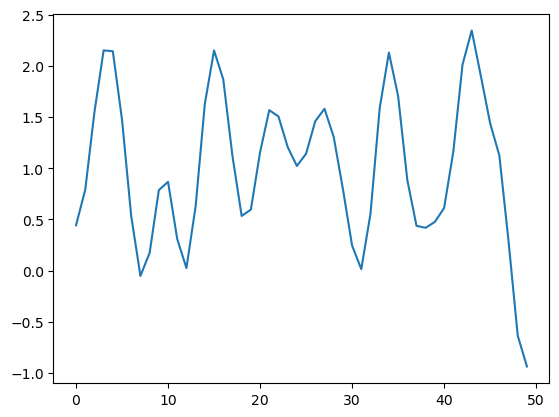

In [10]:

plt.plot(grad_psth/average_grad)
np.var()
print(average_grad)


In [ ]:

A classifier function in this case is a function that read {spike train (or an array of spike trains), m, r, sigma, beta} and predict whether the given spike train is generated by step model (return 0) or ramp model (return 1)

# Week 2

# Week 3

# Week 4